IPython Updating
==

In [1]:
from IPython.display import display, update_display, Markdown
import time

ID = "my_id"

# Markdown isn't really needed here, but it gets rid of
# the annoying quotes... there is probably a better way to do that.
display(Markdown("Progress 0/20"), display_id=ID)

for i in range(20):
    time.sleep(0.1)
    update_display(Markdown(f"Progress: {i+1}/20"), display_id=ID)

Progress: 20/20

A neater version without string IDs:

In [89]:
from IPython.display import DisplayHandle, Markdown
import time

handle = DisplayHandle()
handle.display(Markdown("Progress 0/20"))

for i in range(20):
    time.sleep(0.1)
    handle.update(Markdown(f"Progress: {i+1}/20"))

Progress: 20/20

IPython Animation
==

This is a straightforward and probably very inefficient method, but it doesn't require any extra libraries or anything and is easier to work with than matplotlib built-in animation.

Step 1: Save a series of matplotlib plots to png images.

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import io

X = np.linspace(0, 1, 1000)

# Store a list of images in byte array form
frames = list()

for n in range(1, 20):
    
    # Some simple cosine waves. 
    Y = np.cos(X*n*np.pi)
    
    # This is like a file stream, but in memory
    # (It means the disk doesn't have to be involved)
    image = io.BytesIO()
    
    plt.plot(X, Y)
    
    # Save the plot as a png to the file-like object in memory.
    plt.savefig(image)
    
    # This clears the figure. This has the double purpose
    # of both clearing the canvas for the next frame and preventing
    # the notebook from printing the current frame. That second one
    # means that you don't end up with an annoying 20 plots in the output.
    plt.close()
    
    # The stream position will be at the
    # end after writing, set it back to the beginning
    image.seek(0)
    
    # The data is needed in array form rather 
    # than stream form.
    image = image.read()
    
    frames.append(image)

Step 2: Use IPython display to play back those images. 

In [92]:
import time

# This is built-in, it's the python interface to the notebook 
# output cells afaik, though I'm not sure.
from IPython.display import display, update_display, Image

screen = Image(frames[0], width = 500, height=500)

# Notice that the ID is used to connect
# the initial display with the calls to update.
ID = "my_id"
display(screen, display_id = ID)

for i in range(1, len(frames)):
    
    time.sleep(0.1)
    
    # Change the image data. This does not affect the output!
    screen.data = frames[i]
    
    # Update the actual HTML element with the changed image
    update_display(screen, display_id=ID)

Progress: 20/20

The playback flashed quite a bit on first playing as of writing this, but replaying it works fine. I wonder if there is a cache related thing going on...

This second method works first time, but it requires ipywidgets.

In [93]:
import ipywidgets as widgets


screen = widgets.Image(
    value=frames[0],
    format='png',
    width=500,
    height=600,
)

display(screen)

for i in range(1, len(frames)):
    time.sleep(0.1)
    screen.value = frames[i]

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb0\x00\x00\x01 \x08\x06\x00\x00\x00\xd5(&i\x00\…

Finally, another IPython way, which is a bit less fiddly (but still suffers from the same problem)

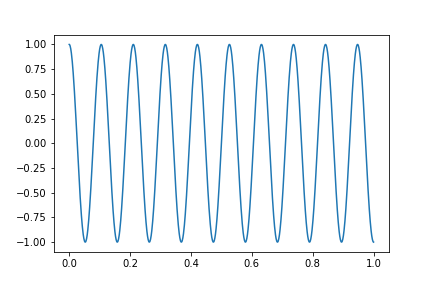

In [94]:
import time

# This is built-in, it's the python interface to the notebook 
# output cells afaik, though I'm not sure.
from IPython.display import Image, DisplayHandle, clear_output

handle = DisplayHandle()
screen = Image(frames[0], width = 500, height=500)

handle.display(screen)

for i in range(1, len(frames)):
    
    time.sleep(0.1)
    
    # Change the image data. This does not affect the output!
    screen.data = frames[i]
    
    # Update the actual HTML element with the changed image
    handle.update(screen)